<a href="https://colab.research.google.com/github/Sinyoung3016/MachineLearning_Tutorial/blob/master/ML_lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 18.6340
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 8.3853
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 3.7827
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1.7152
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7859
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3677
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1791
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 9/100
1/1 [==============

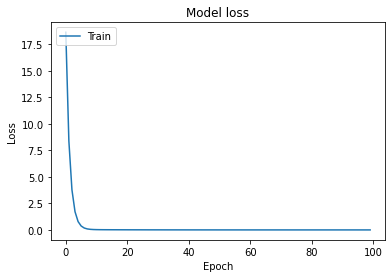

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#1.data set 설정
x_train = [1, 2, 3, 4]
y_train = [1, 2, 3, 4]

#2.Model 구성
tf.model = tf.keras.Sequential()
  # units == output shape, input_dim == input shape
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

#3. Model 학습과정 설정
  # SGD == standard gradient descendent, lr == learning rate
sgd = tf.keras.optimizers.SGD(lr=0.1)
  # mse == mean_squared_error, 1/m * sig (y'-y)^2
tf.model.compile(loss='mse', optimizer=sgd)
  # prints summary of the model to the terminal
tf.model.summary()

#4. Model 학습
  # fit() trains the model and returns history of train
history = tf.model.fit(x_train, y_train, epochs=100)

#6. Model 사용하기
  # predict() returns predicted value
y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

  # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
##### Version01 #####
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt #Graph
tf.disable_v2_behavior()

In [ ]:
##Draw Graph

X = [1,2,3]
Y = [1,2,3]
W = tf.placeholder(tf.float32)

hypothesis = W * X #H(x)

cost = tf.reduce_mean(tf.square(hypothesis - Y))#cost(W)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = [] 

for i in range(-20, 50):
  feed_W = i * 0.1 #-3~5, 0.1의 간격으로 이동
  curr_cost, curr_W = sess.run([cost, W], feed_dict = {W: feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)

plt.plot( W_val, cost_val) #plot(X축, Y축)
plt.show()

In [ ]:
##User Gradient Function

X_data = [1,2,3]
Y_data = [1,2,3]
W = tf.Variable(tf.random_normal([1]), name = 'weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#Minimize : Gradient Descent
#W -= learning_rate * derivative
learning_rate = 0.1 #배우는 속도
gradient = tf.reduce_mean((W*X-Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent) #tensorflow는 assign으로 할당

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
  sess.run(update, feed_dict = {X : X_data, Y : Y_data})
  print(step, sess.run(cost, feed_dict = {X : X_data, Y : Y_data }), sess.run(W))


In [ ]:
##Use GradientDescentOptimizer
X = [1,2,3]
Y = [1,2,3]
W = tf.Variable(10.0)

hypothesis = W * X #H(x)

cost = tf.reduce_mean(tf.square(hypothesis - Y))#cost(W)
#minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
  print(step, sess.run(W))
  sess.run(train)

In [ ]:
##Compare user_gradient and apply_gradient

X = [1,2,3]
Y = [1,2,3]
W = tf.Variable(5.0)

hypothesis = W * X 

user_gradients = tf.reduce_mean( (W*X-Y)*X )*2 
#원래 미분할때 2로 나뉘지만 간략화 가능
#그냥 씀 하지만 지금은 컴퓨팅과 비교하는 것이므로 2를 곱함

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
gvs = optimizer.compute_gradients(cost,[W])
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
  print(step, sess.run([user_gradients, W, gvs]))
  sess.run(apply_gradients)

  #conclusion : same 
